In [1]:
#1)
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#2.1)
data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])
x = data[:,0]
y= data[:,1]

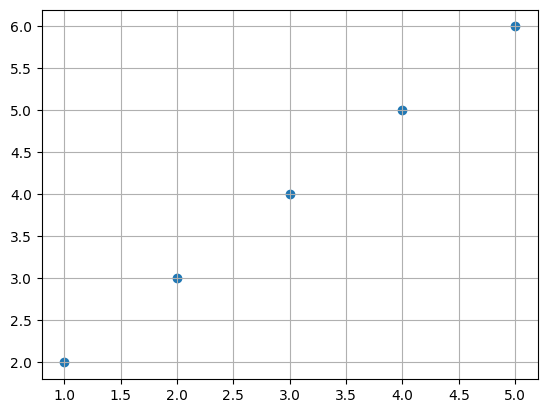

In [3]:
plt.scatter(x,y)
plt.grid(True)
plt.show()

In [ ]:
#2.2)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)

In [ ]:
vectorizer.get_feature_names_out()

array(['disk', 'format', 'hard', 'how', 'my', 'problems', 'to'],
      dtype=object)

In [ ]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]])

In [ ]:
X.toarray()[0]

array([1, 1, 1, 1, 1, 0, 1])

In [ ]:
X.toarray()[1,2]

1

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics',
'sci.med']

In [ ]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
shuffle=True, random_state=42)

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
train_counts = vectorizer.fit_transform(twenty_train.data)

In [ ]:
vectorizer.vocabulary_.get('algorithm')

4690

In [ ]:
len(vectorizer.get_feature_names_out())

35788

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
sorted(vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [ ]:
#3)
import nltk

In [ ]:
s = nltk.stem.SnowballStemmer('english')

In [ ]:
s.stem("cats")

'cat'

In [ ]:
s.stem("loving")

'love'

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt') #if not used nltk.download()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = word_tokenize("And now for something completely different")

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


True

In [ ]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [ ]:
#4)
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
analyze = vectorizer.build_analyzer()

In [ ]:
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

In [ ]:
import	nltk.stem

In [ ]:
english_stemmer	=	nltk.stem.SnowballStemmer('english')

In [ ]:
class	StemmedCountVectorizer(CountVectorizer):
  def	build_analyzer(self):
    analyzer	=	super(StemmedCountVectorizer,	self).build_analyzer()
    return	lambda	doc:	(english_stemmer.stem(w)	for	w	in	analyzer(doc))

In [ ]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')

In [ ]:
stem_analyze = stem_vectorizer.build_analyzer()

In [ ]:
Y = stem_analyze("John bought carrots and potatoes")

In [ ]:
for tok in Y:
  print(tok)

john
bought
carrot
potato


In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
categories = ['alt.atheism','soc.religion.christian','comp.graphics', 'sci.med']

In [ ]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [ ]:
train_counts = stem_vectorizer.fit_transform(twenty_train.data)
len(stem_vectorizer.get_feature_names_out())

26888

In [ ]:
#Implementacion propia

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

In [ ]:
stem_vectorizer = CountVectorizer(stop_words=spanish_stopwords)

In [ ]:
stem_analyze = stem_vectorizer.build_analyzer()

In [ ]:
analyze = stem_vectorizer.build_analyzer()

In [ ]:
analyze("Ilan juega al futbol con amigos")

['ilan', 'juega', 'futbol', 'amigos']

In [ ]:
spanish_stemmer=nltk.stem.SnowballStemmer('spanish')

In [ ]:
class	StemmedCountVectorizer(CountVectorizer):
  def	build_analyzer(self):
    analyzer	=	super(StemmedCountVectorizer,	self).build_analyzer()
    return	lambda	doc:	(spanish_stemmer.stem(w)	for	w	in	analyzer(doc))

In [ ]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words=spanish_stopwords)

In [ ]:
stem_analyze = stem_vectorizer.build_analyzer()

In [ ]:
#frase 1)
Y = stem_analyze("Ilan juega al futbol con amigos")

In [ ]:
for tok in Y:
  print(tok)

ilan
jueg
futbol
amig


In [ ]:
#Frase 2)
Y = stem_analyze("La pelota no se mancha")

In [ ]:
for tok in Y:
  print(tok)

pelot
manch


In [ ]:
#Importacion de corpus en español
import es_core_news_sm
nlp = es_core_news_sm.load()